<a href="https://colab.research.google.com/github/Sujata018/DeepLearning/blob/main/classification/CNN_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets,layers,models
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    '''
    Plot test images and display the predicted and true label
    '''
    true_label, img = true_label[i][0], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [ ]:
def plot_value_array(i, predictions_array, true_label):
    '''
    Plot a bar chart of the softmax output with probabilites of different predicted labels
    '''
    true_label = true_label[i][0]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [ ]:


# load data 
#(train_images,train_labels),(test_images,test_labels)=datasets.cmaterdb.load_data()
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()



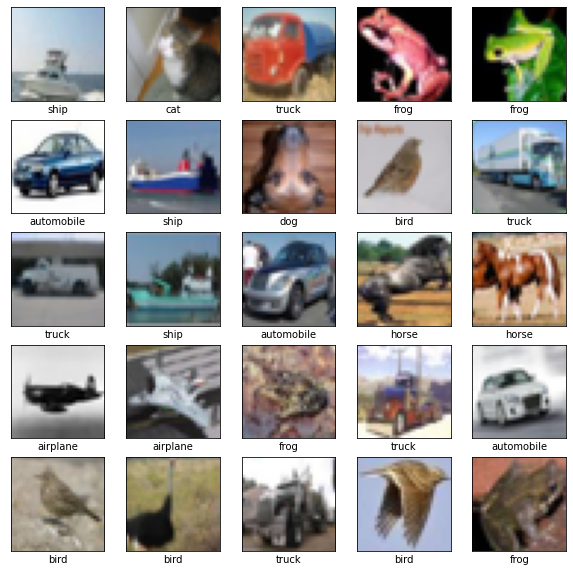

In [ ]:
# normialize input images

train_images,test_images=train_images/255,test_images/255

# verify data

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i+100])
    plt.xlabel(class_names[train_labels[i+100][0]])
plt.show()



In [ ]:
# create convolutional model

model=models.Sequential()
#model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape(train_images[1].shape)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [ ]:
# compile and train the model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#history = model.fit(train_images, train_labels, epochs=10, 
 #                   validation_data=(test_images, test_labels))

model.fit(train_images, train_labels, epochs=10)



Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.5350 - accuracy: 0.4383
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1664 - accuracy: 0.5859
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0221 - accuracy: 0.6369
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9291 - accuracy: 0.6741
Epoch 5/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.8624 - accuracy: 0.6946
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7981 - accuracy: 0.7182
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7497 - accuracy: 0.7374
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7033 - accuracy: 0.7513
Epoch 9/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6621 - accuracy: 0.7672
Epoch 10/10
1563/1563 [==============================] - 62s 40m

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Test Accuracy : ',test_acc)


313/313 - 3s - loss: 0.8860 - accuracy: 0.6989
Test Accuracy :  0.6988999843597412


In [ ]:
# create probability model to make predictions

probability_model=tf.keras.Sequential([model,
                                       tf.keras.layers.Softmax()])
predictions=probability_model.predict(test_images)


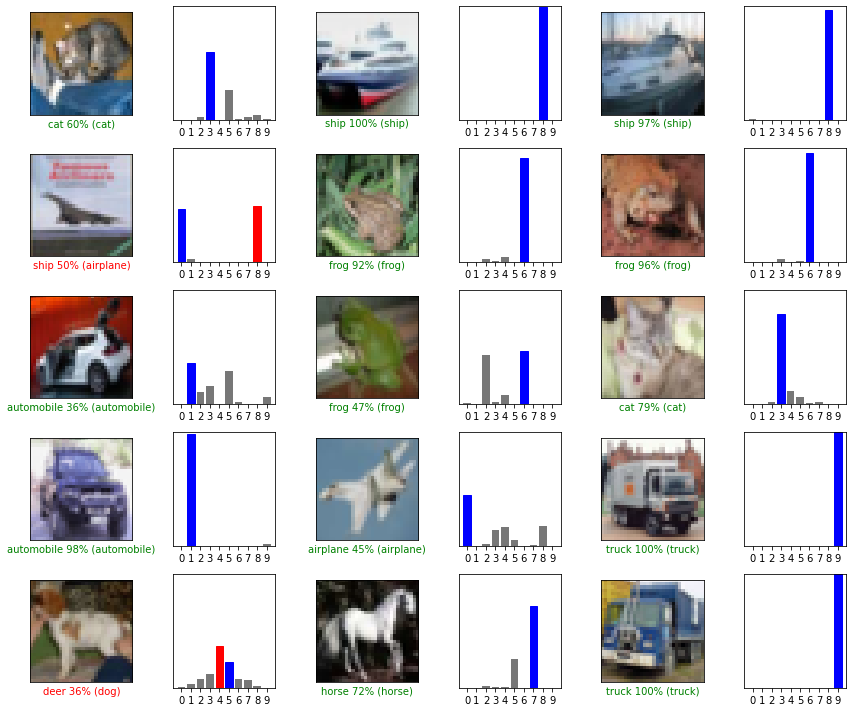

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot a few test images, their prediction and true labels.
# Color code : green for correct prediction, red for wrong prediction

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(i, predictions[i], test_labels, test_images)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
plt.savefig("CIFAR10_predictions.jpg")
